## Random forests en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### Random forests para clasificación

Para ejemplificar la implementación de un random forest para clasificación utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Además, no es necesario que las variables predictoras estén normalizadas, ya que los random forests, y por lo tanto, los árboles de decisión no se ven afectados por la escala de los datos debido a la forma en la que funcionan: toman decisiones basadas en ciertos umbrales de características, independientemente de su escala.

#### Paso 2: Inicialización y entrenamiento del modelo

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Creamos un random forest con 4 árboles
model = RandomForestClassifier(n_estimators = 4)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

Una vez que el modelo ha entrenado correctamente, podemos visualizar el random forest con la misma librería. Esta visualización mostrará cada árbol derivado completo:

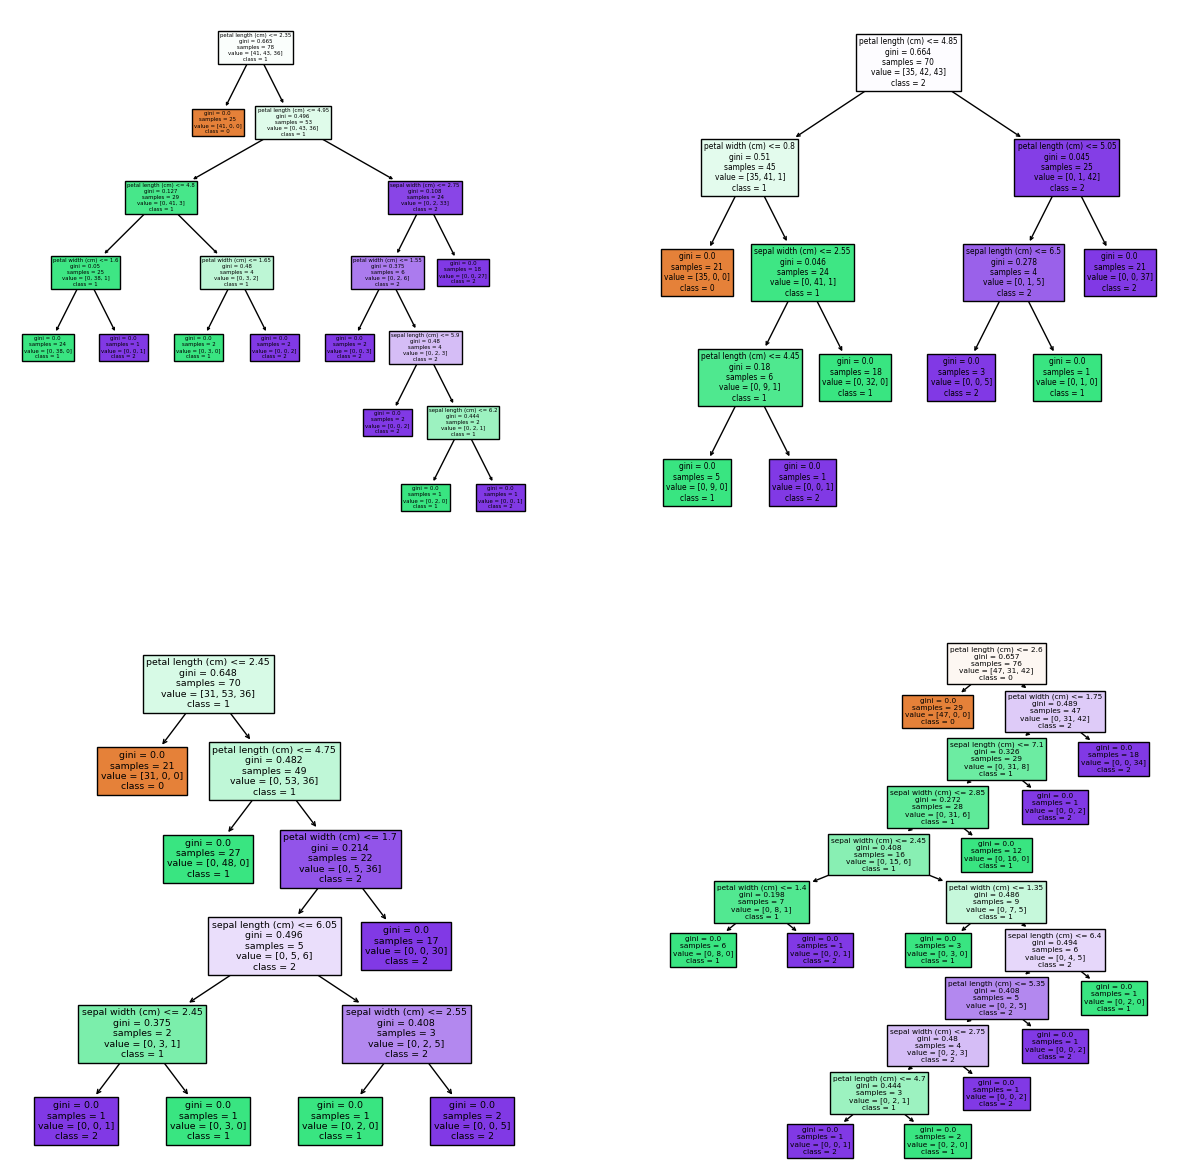

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

El tiempo de entrenamiento de un modelo dependerá, en primer lugar, del tamaño del conjunto de datos (instancias y características), y también de la cantidad de árboles queramos que tenga nuestro random forest.

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [4]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

El modelo es perfecto!

### Random forest para regresión

Para ejemplificar la implementación de un random forest utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [6]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

In [7]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

#### Paso 2: Inicialización y entrenamiento del modelo

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 4)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=4)

#### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [9]:
y_pred = model.predict(X_test)
y_pred

array([609.  , 574.  , 589.75, 645.5 , 484.75, 589.25, 490.75, 715.5 ,
       508.75, 587.25])

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*):

In [10]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 3464.2375
